In [15]:
#potrzebne importy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# ładujemy nasze dane
# dla uproszczenia używamy tylko 2 cech ( features)
iris_data = load_iris(return_X_y=False)
X = iris_data.data[:, 0:2]
y = iris_data.target

# tworzymy klasyfikator Drzewa decyzyjnego
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=2)

tree_clf.fit(X, y)
print(tree_clf.score(X, y))

0.8133333333333334


In [0]:
# zapisywanie drzewa do pliku
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file='nasze_drzewo.dot',          # gdzie zapisać
                feature_names=iris_data.feature_names[2:], # jakie nazwy features, cech dodać
                class_names=iris_data.target_names,        # nazwy klas jakie chcemy przewidywać
                rounded=True,                         # dodatkowe parametry
                filled=True)

In [0]:
! dot -Tpng nasze_drzewo.dot -o nasze_drzewo.png

Porównanie drzew decyzyjnych z minimalnym ograniczeniem oraz bez ograniczeń

In [0]:
# bierzemy wsyzstkie dane z iris dataset
X = iris_data.data
y = iris_data.target

In [36]:
# tworzymy klasyfikator Drzewa decyzyjnego z ograniczoną głębokością
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

tree_clf.fit(X, y)
print(tree_clf.score(X, y))

0.9733333333333334


In [37]:
# tworzymy klasyfikator Drzewa decyzyjnego all inclusive bez ograniczeń
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X, y)
print(tree_clf.score(X, y))

# UWAGA WYNIK DOKŁADNOŚCI WYNOSZĄCY 1.0 ZNACZY ŻE NMODEL ULEGA OVERFITTINGOWI

1.0


In [50]:
# sprawdzanie czy następuje overfitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# tworzymy klasyfikator Drzewa decyzyjnego z ograniczoną głębokością
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=2)

tree_clf.fit(X_train, y_train)
print(" score danych treningowych z ograniczeniem ", tree_clf.score(X_train, y_train))
print(" score danych testowych z ograniczeniem    ", tree_clf.score(X_test, y_test))

 score danych treningowych z ograniczeniem  0.9833333333333333
 score danych testowych z ograniczeniem     0.9666666666666667


In [51]:
# tworzymy klasyfikator Drzewa decyzyjnego z ograniczoną głębokością
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)
print(" score danych treningowych bez ograniczenia ", tree_clf.score(X_train, y_train))
print(" score danych testowych bez ograniczenia    ", tree_clf.score(X_test, y_test))

# UWAGA NA JEDYNKI AAAAAAA OVERFITTING PEŁNĄ GĘBĄ

 score danych treningowych bez ograniczenia  1.0
 score danych testowych bez ograniczenia     0.9666666666666667


Przykład podziału na zbiorze moon data

In [0]:
# tworzenie zbioru danych
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_moons(noise=0.8, random_state=0)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# narysowanie siatki o odpowiednich rozmiarach
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                      np.arange(y_min, y_max, .02))

# metoda do wyrysowania punktów
# jak ktoś chce może się zagłebić, ale nie jest to celem tego kursu
def plot_dataset(X_train, X_test, y_train, y_test, clf=None, plot_train=True, plot_test=True):

  # rysowanie zbioru danych  
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(1, 1, 1)
  if plot_test:
    ax.set_title("Test data")
    X = X_test
  else:
    ax.set_title("Train data")
    X = X_train
  
  # narysowanie siatki o odpowiednich rozmiarach
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                        np.arange(y_min, y_max, .02))
  
  # rysowanie decision boundary dla klsyfikatora
  if clf is not None:
    plot_colors = "bry"
    plot_step = 0.02
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  # Rysowanie punktów treningowych
  if plot_train:
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired,
              edgecolors='k',)
  # Rysowanie punktów testowych - bardziej przezroczyste
  if plot_test:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, alpha=0.9,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  return ax

In [102]:
# tworzymy klasyfikator Drzewa decyzyjnego z ograniczoną głębokością
tree_clf = DecisionTreeClassifier(max_depth=3,  random_state=42)

tree_clf.fit(X_train, y_train)
print(" score danych treningowych z ograniczeniem ", tree_clf.score(X_train, y_train))
print(" score danych testowych z ograniczeniem    ", tree_clf.score(X_test, y_test))

 score danych treningowych z ograniczeniem  0.7166666666666667
 score danych testowych z ograniczeniem     0.6


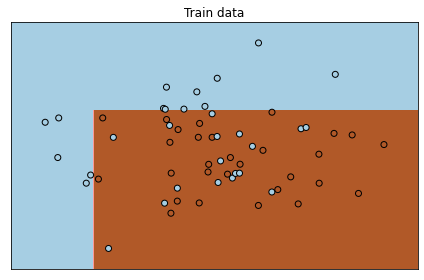

In [103]:

# wyświetlamy jak wygląda podział dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_test=False)
plt.tight_layout()
plt.show()

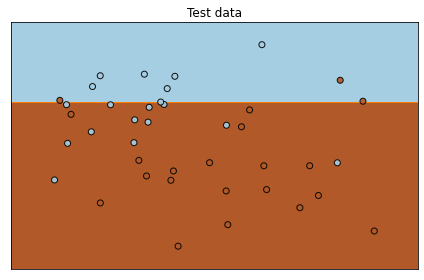

In [104]:

# wyświetlamy jak wygląda podział dla danych testowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_train=False)
plt.tight_layout()
plt.show()

In [105]:
# tworzymy klasyfikator Drzewa decyzyjnego bez ograniczenia głebokości
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)
print(" score danych treningowych bez ograniczenia ", tree_clf.score(X_train, y_train))
print(" score danych testowych bez ograniczenia    ", tree_clf.score(X_test, y_test))

 score danych treningowych bez ograniczenia  1.0
 score danych testowych bez ograniczenia     0.675


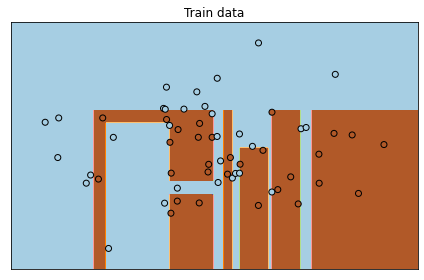

In [106]:

# wyświetlamy jak wygląda podział dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_test=False)
plt.tight_layout()
plt.show()

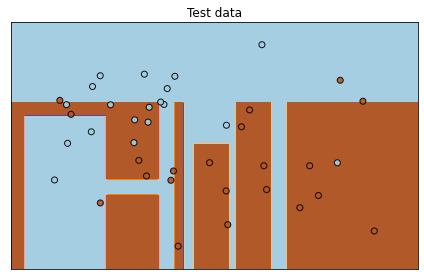

In [107]:

# wyświetlamy jak wygląda podział dla danych testowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_train=False)
plt.tight_layout()
plt.show()

In [109]:
# Idealny wykres

# tworzenie zbioru danych
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_moons(noise=0.1, random_state=0)

# podzial danych na treningowe i testowe
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.6, random_state=42)

# tworzymy klasyfikator Drzewa decyzyjnego z ograniczoną głębokością
tree_clf = DecisionTreeClassifier(min_samples_leaf=4,  random_state=42)

tree_clf.fit(X_train, y_train)
print(" score danych treningowych z ograniczeniem ", tree_clf.score(X_train, y_train))
print(" score danych testowych z ograniczeniem    ", tree_clf.score(X_test, y_test))

 score danych treningowych z ograniczeniem  0.9333333333333333
 score danych testowych z ograniczeniem     0.85


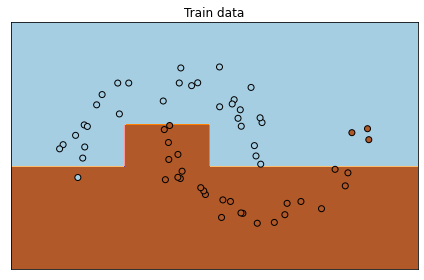

In [110]:

# wyświetlamy jak wygląda podział dla danych treningowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_test=False)
plt.tight_layout()
plt.show()

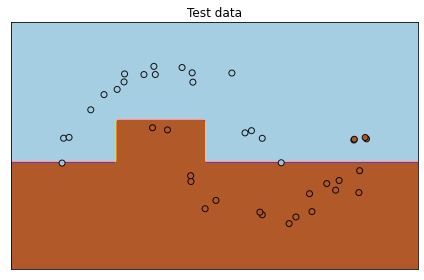

In [111]:

# wyświetlamy jak wygląda podział dla danych testowych

ax = plot_dataset(X_train, X_test, y_train, y_test,clf = tree_clf, plot_train=False)
plt.tight_layout()
plt.show()